## Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift
import seaborn as sns
import matplotlib.pyplot as plt

seed = 17

## Loading data

In [52]:
shcc = pd.read_csv("./DataVis-Assignment-3/combined_shcc_incidents_data.csv")

shcc.replace({'oPt':'OPT'}, inplace=True)
shcc.dropna(inplace=True)

## Clustering using KMeans clustering with clusters

In [55]:
kmeans4 = KMeans(n_clusters=4, random_state=seed)

X = shcc[['Total number of attacks on facilities which reported damage',
       'Total health worker killed', 'Health transportation destroyed', 'Total health worker arrested ', 'Health transportation damaged',
       'Health transportation stolen/highjacked',
       'Total health worker kidnapped', 'Total health worker injured',
       'Total number of attacks on facilities which reported destruction']]


kmeans4.fit(X)

shcc['cluster'] = kmeans4.labels_

/home/saimadhavang/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
shcc['cluster'].value_counts()

cluster
1    5948
0     322
2      24
3      10
Name: count, dtype: int64

## Checking statistical features of each cluster

In [57]:
shcc[shcc['cluster']==0].describe()

,Unnamed: 0,Total number of attacks on facilities which reported damage,Total health worker killed,Health transportation destroyed,Total health worker arrested,Health transportation damaged,Health transportation stolen/highjacked,Total health worker kidnapped,Total health worker injured,Total number of attacks on facilities which reported destruction,cluster
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.0
mean,2486.006211,0.093168,0.263975,0.018634,0.062112,0.118012,0.003106,0.015528,3.288820,0.034161,0.0
std,1739.054239,0.291120,0.737433,0.135437,0.435059,0.384738,0.055728,0.166720,2.000109,0.181927,0.0
min,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0
25%,747.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0
50%,2101.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.0
75%,4158.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.0
max,6246.000000,1.000000,5.000000,1.000000,4.000000,3.000000,1.000000,2.000000,13.000000,1.000000,0.0


In [58]:
shcc[shcc['cluster']==1].describe()

,Unnamed: 0,Total number of attacks on facilities which reported damage,Total health worker killed,Health transportation destroyed,Total health worker arrested,Health transportation damaged,Health transportation stolen/highjacked,Total health worker kidnapped,Total health worker injured,Total number of attacks on facilities which reported destruction,cluster
count,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000,5948.0
mean,3190.275219,0.196537,0.136012,0.012777,0.122562,0.060693,0.047243,0.129119,0.123907,0.047411,1.0
std,1819.044498,0.468128,0.549388,0.123720,0.576668,0.747069,0.504849,0.846246,0.329503,0.269094,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1613.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3195.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4778.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,6305.000000,11.000000,18.000000,2.000000,9.000000,50.000000,21.000000,42.000000,1.000000,10.000000,1.0


In [59]:
shcc[shcc['cluster']==2].describe()

,Unnamed: 0,Total number of attacks on facilities which reported damage,Total health worker killed,Health transportation destroyed,Total health worker arrested,Health transportation damaged,Health transportation stolen/highjacked,Total health worker kidnapped,Total health worker injured,Total number of attacks on facilities which reported destruction,cluster
count,24.000000,24.0,24.000000,24.0,24.000000,24.0,24.0,24.0,24.000000,24.0,24.0
mean,3801.375000,0.0,0.041667,0.0,19.000000,0.0,0.0,0.0,0.291667,0.0,2.0
std,950.136046,0.0,0.204124,0.0,8.602325,0.0,0.0,0.0,1.232853,0.0,0.0
min,901.000000,0.0,0.000000,0.0,10.000000,0.0,0.0,0.0,0.000000,0.0,2.0
25%,3798.500000,0.0,0.000000,0.0,15.000000,0.0,0.0,0.0,0.000000,0.0,2.0
50%,3932.500000,0.0,0.000000,0.0,20.000000,0.0,0.0,0.0,0.000000,0.0,2.0
75%,3946.250000,0.0,0.000000,0.0,20.000000,0.0,0.0,0.0,0.000000,0.0,2.0
max,6270.000000,0.0,1.000000,0.0,56.000000,0.0,0.0,0.0,6.000000,0.0,2.0


In [60]:
shcc[shcc['cluster']==3].describe()

,Unnamed: 0,Total number of attacks on facilities which reported damage,Total health worker killed,Health transportation destroyed,Total health worker arrested,Health transportation damaged,Health transportation stolen/highjacked,Total health worker kidnapped,Total health worker injured,Total number of attacks on facilities which reported destruction,cluster
count,10.000000,10.0,10.000000,10.0,10.0,10.000000,10.0,10.0,10.000000,10.0,10.0
mean,860.100000,0.0,0.100000,0.0,0.0,1.200000,0.0,0.0,27.400000,0.0,3.0
std,988.566577,0.0,0.316228,0.0,0.0,2.573368,0.0,0.0,9.395034,0.0,0.0
min,258.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,16.000000,0.0,3.0
25%,279.750000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,18.500000,0.0,3.0
50%,306.500000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,28.000000,0.0,3.0
75%,1380.500000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,34.500000,0.0,3.0
max,3063.000000,0.0,1.000000,0.0,0.0,7.000000,0.0,0.0,42.000000,0.0,3.0


## Visualizing number of incidents in each cluster

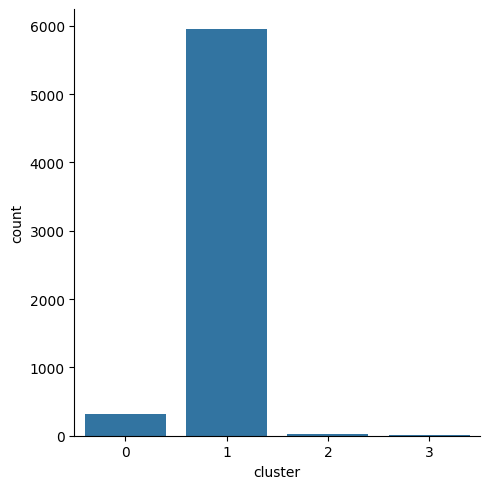

In [28]:
sns.catplot(data=shcc, x='cluster', kind='count')

## Drawing inferences from each cluster

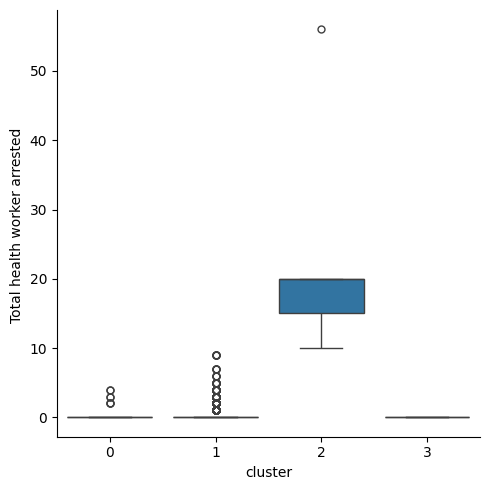

In [29]:
sns.catplot(data=shcc, y='Total health worker arrested ', x='cluster', kind='box')

Cluster 2 seems to represent incidents where a large number of health workers seem to have been kidnapped

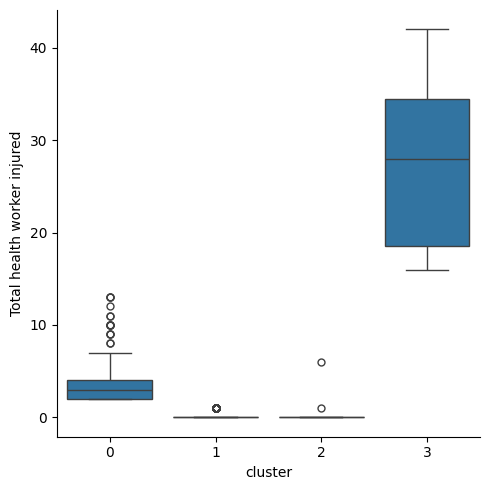

In [30]:
sns.catplot(data=shcc, y='Total health worker injured', x='cluster', kind='box')

Cluster 0 seems to indicate countries with less but non-zero number of health workers injured

Cluster 3 seems to indicate countries with more number of health workers injured

Cluster 1 seems to be a generic cluster where majority of the incidents lie

## Visualizing countries belonging to each cluster

### Cluster 0

In [62]:
cluster_0 = shcc.loc[shcc['cluster']==0]

In [63]:
grouped_cluster_0 = cluster_0.groupby('Country').count().reset_index()
grouped_cluster_0 = grouped_cluster_0[['Country', 'Total health worker injured']]
grouped_cluster_0.sort_values('Total health worker injured', ascending=False, inplace=True)
grouped_cluster_0.reset_index(inplace=True)

In [64]:
countries = grouped_cluster_0['Country'][:9]
count = grouped_cluster_0['Total health worker injured'][:9]

countries[9] = 'Others'
count[9] = grouped_cluster_0['Total health worker injured'][9:].sum()

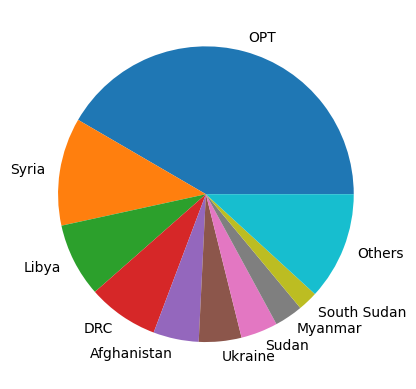

In [67]:
plt.pie(count, labels=countries)

plt.show()

Incidents from OPT (Other Palestenian Territories), Syria, Libya and DRC (Congo) seem to be predominant in this cluster

This means conflicts in these regions are likely to injure health workers in the region

### Cluster 1

In [68]:
cluster_1 = shcc.loc[shcc['cluster']==1]

In [69]:
grouped_cluster_1 = cluster_1.groupby('Country').count().reset_index()
grouped_cluster_1 = grouped_cluster_1[['Country', 'Total health worker injured']]
grouped_cluster_1.sort_values('Total health worker injured', ascending=False, inplace=True)
grouped_cluster_1.reset_index(inplace=True)

In [73]:
countries = grouped_cluster_1['Country'][:9]
count = grouped_cluster_1['Total health worker injured'][:9]

countries[9] = 'Others'
count[9] = grouped_cluster_1['Total health worker injured'][9:].sum()

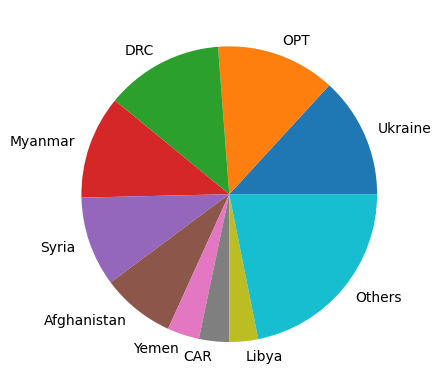

In [74]:
plt.pie(count, labels=countries)

plt.show()

Since cluster 1 is generic and doesn't have any unique attributes, the number of incidents of countries in this cluster is somewhat representative of their number of incidents in the entire dataset

### Cluster 2

In [81]:
cluster_2 = shcc.loc[shcc['cluster']==2]

In [83]:
grouped_cluster_2 = cluster_2.groupby('Country').count().reset_index()
grouped_cluster_2 = grouped_cluster_2[['Country', 'Total health worker arrested ']]
grouped_cluster_2.sort_values('Total health worker arrested ', ascending=False, inplace=True)
grouped_cluster_2.reset_index(inplace=True)

In [84]:
grouped_cluster_2

,index,Country,Total health worker arrested
0,1,Myanmar,18
1,3,Sudan,2
2,4,Syria,2
3,0,Iran,1
4,2,Pakistan,1


In [87]:
countries = grouped_cluster_2['Country']
count = grouped_cluster_2['Total health worker arrested ']

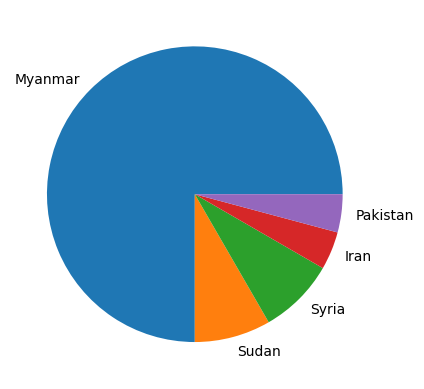

In [88]:
plt.pie(count, labels=countries)

plt.show()

We observe that incidents from Myanmar, Pakistan, Iran, Syria and Sudan find their place in cluster 2 which is indicative of a large number of health workers arrests.

This is indicative of the oppressiveness of regimes in these countries.

### Cluster 3

In [89]:
cluster_3 = shcc.loc[shcc['cluster']==3]

In [90]:
grouped_cluster_3 = cluster_3.groupby('Country').count().reset_index()
grouped_cluster_3 = grouped_cluster_3[['Country', 'Total health worker injured']]
grouped_cluster_3.sort_values('Total health worker injured', ascending=False, inplace=True)
grouped_cluster_3.reset_index(inplace=True)

In [92]:
countries = grouped_cluster_3['Country']
count = grouped_cluster_3['Total health worker injured']

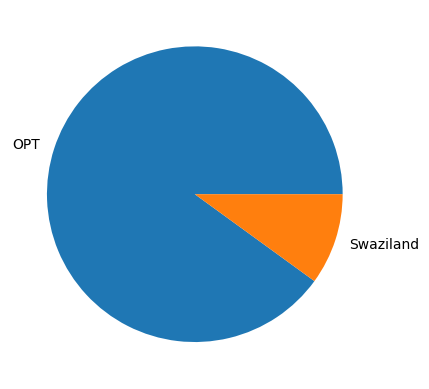

In [93]:
plt.pie(count, labels=countries)

plt.show()

We observe that 9 out of the 10 incidents in cluster 3 are from Palestine. 

The large number of health care workers injures might indicate widespread attacks on civilians or attacking health infrastructure as a strategic objective. (Both of which are against the Geneva Convention rules.)